In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle

# 读取数据

In [2]:
dataset = pd.read_csv('./data/SupplyChain.csv', encoding='unicode_escape' )

In [4]:
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
# 查看缺失值
dataset.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [6]:
# 组合customer的完整名字
dataset[['Customer Fname', 'Customer Lname']]
# Full Name = Fname+Lname

dataset['Customer Full Name'] = dataset['Customer Fname'] +' '+ dataset['Customer Lname']

In [7]:
dataset[['Customer Id', 'Customer Full Name', 'Customer Fname', 'Customer Lname']]

,Customer Id,Customer Full Name,Customer Fname,Customer Lname
0,20755,Cally Holloway,Cally,Holloway
1,19492,Irene Luna,Irene,Luna
2,19491,Gillian Maldonado,Gillian,Maldonado
3,19490,Tana Tate,Tana,Tate
4,19489,Orli Hendricks,Orli,Hendricks
...,...,...,...,...
180514,1005,Maria Peterson,Maria,Peterson
180515,9141,Ronald Clark,Ronald,Clark
180516,291,John Smith,John,Smith
180517,2813,Mary Smith,Mary,Smith


In [8]:
dataset['Customer Zipcode'].value_counts()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

In [9]:
# 查看缺失值
dataset['Customer Zipcode'].isnull().sum()

3

In [10]:
# 字段补全，用0
dataset['Customer Zipcode'] = dataset['Customer Zipcode'].fillna(0)
dataset['Customer Zipcode'].value_counts()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
89015.0       16
32210.0       15
7728.0        13
11225.0        9
0.0            3
Name: Customer Zipcode, Length: 996, dtype: int64

# 数据探索
**热力图分析相关性**

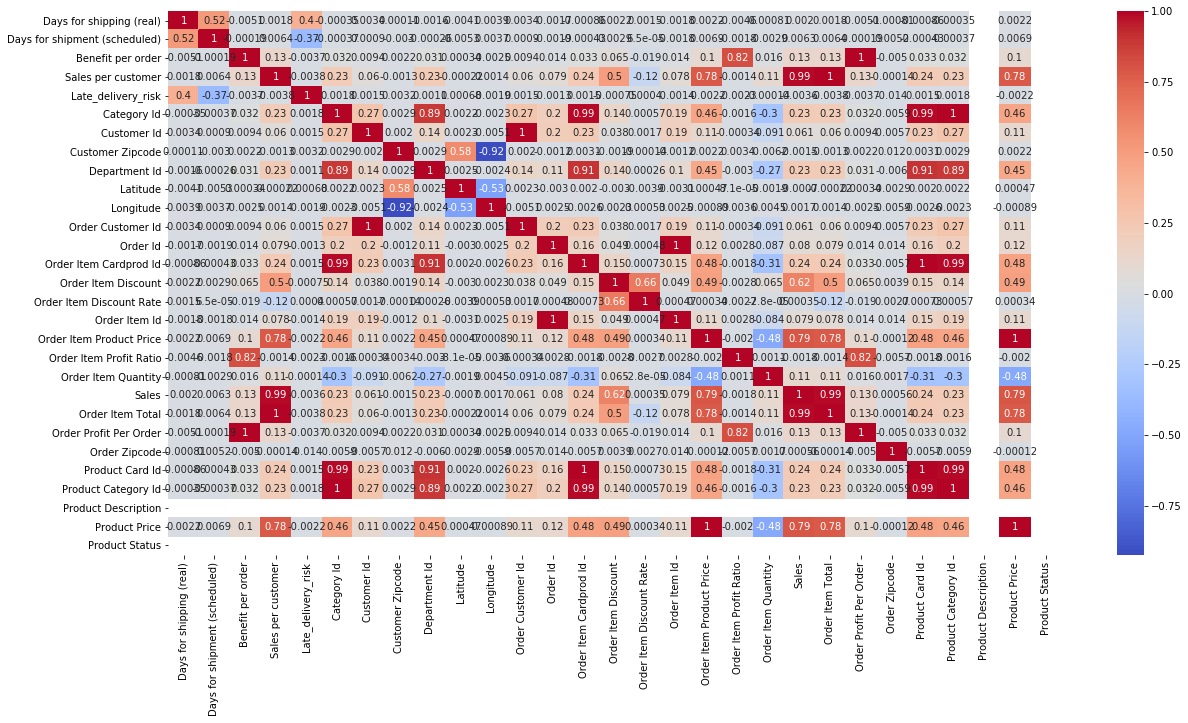

In [12]:
# 特征字段之间的相关性
data = dataset
plt.figure(figsize=(20,10))

sns.heatmap(data.corr(),annot = True, cmap='coolwarm') # annot=True 可显示数字

分析结论1：
- Order Item Total 与 sales per customer完全相关 
- Order Item Id 与 Order Id 完全相关 
- Product card Id 与 Order Item cardprod id 完全相关 
- Order Customer Id 与 Customer Id完全相关

**按照不同的Market，Order Region聚合**

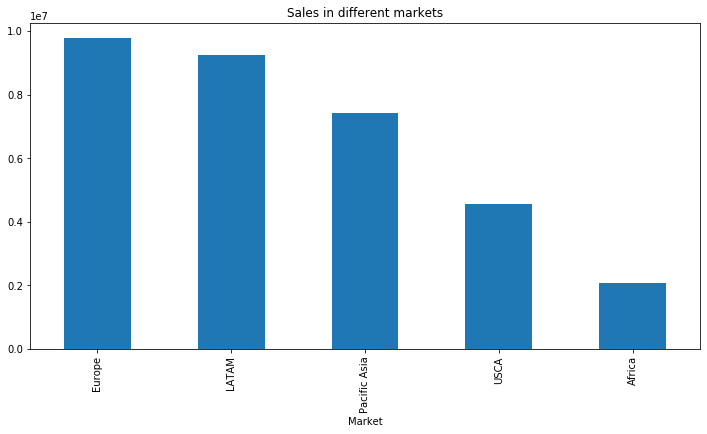

In [13]:
# 基于Market进行聚合
data['Market'].value_counts()
market = data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Sales in different markets')
plt.show()

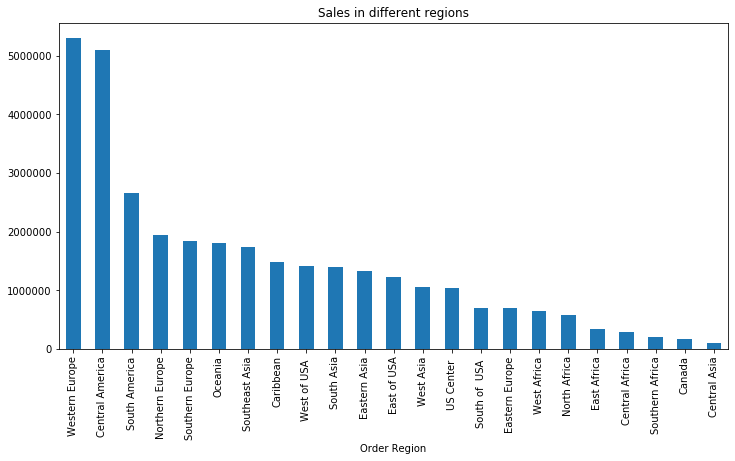

In [14]:
# 基于Order Region进行聚合
region = data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Sales in different regions')
plt.show()

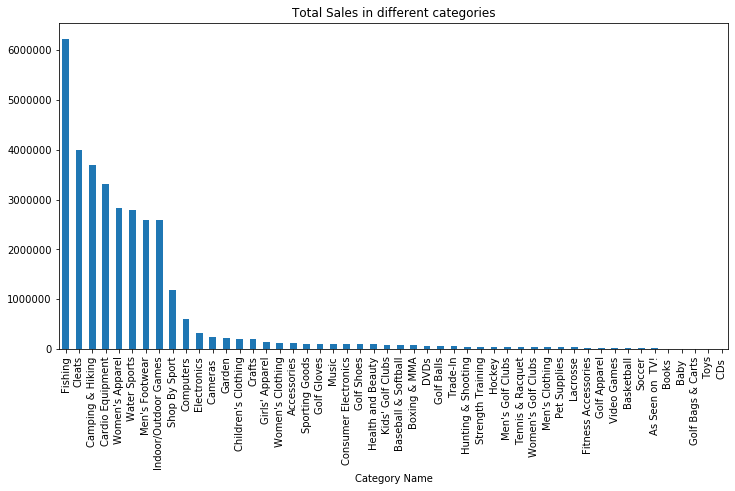

In [15]:
# 按照不同的Category Name进行聚合
cat = data.groupby('Category Name')
# 计算累计值
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Total Sales in different categories')
plt.show()

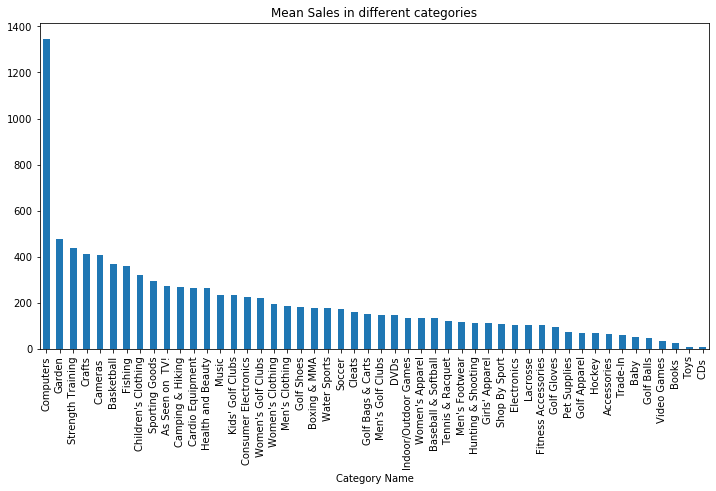

In [16]:
# 计算均值
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Mean Sales in different categories')
plt.show()

**时间维度分析**

In [18]:
# 按照不同的时间维度（年、月、星期、小时）的趋势
data['order date (DateOrders)'].value_counts()
# 创建时间戳索引
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [19]:
# 取'order date (DateOrders)'字段中year,month,weekday,hour,month_year
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M')
data[['order_year', 'order_month', 'order_week_day', 'order_hour', 'order_month_year']]

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


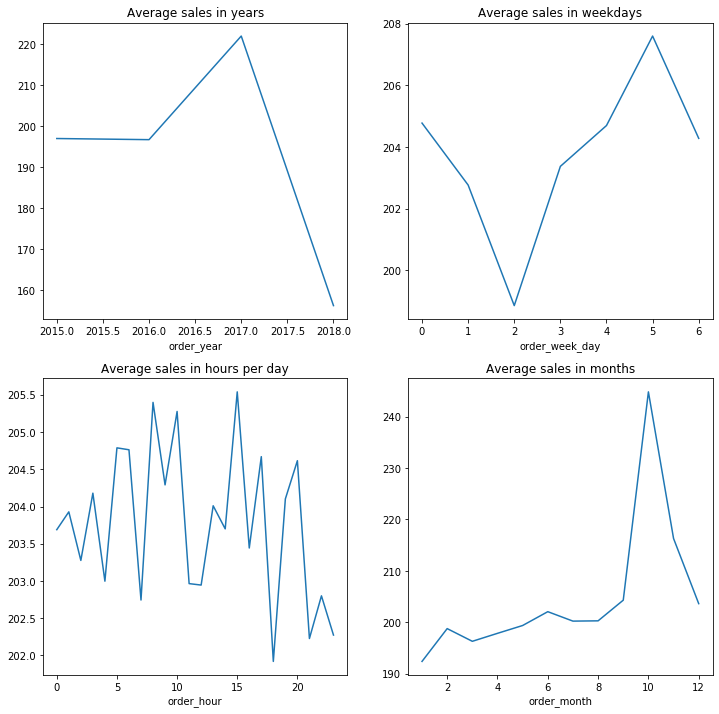

In [20]:
#  对销售额按照不同的时间维度探索
plt.figure(figsize=(20,10))
plt.subplot(221)
df_year = data.groupby('order_year')
df_year['Sales'].mean().plot(figsize=(12,12), title='Average sales in years')

plt.subplot(222)
df_day = data.groupby('order_week_day')
df_day['Sales'].mean().plot(figsize=(12,12), title='Average sales in weekdays')

plt.subplot(223)
df_hour = data.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(12,12), title='Average sales in hours per day')

plt.subplot(224)
df_month = data.groupby('order_month')
df_month['Sales'].mean().plot(figsize=(12,12), title='Average sales in months')

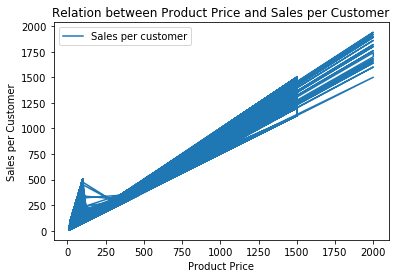

In [24]:
# product price 与 sales per customer 相关性如何
data.plot(x='Product Price', y='Sales per customer')
plt.title('Relation between Product Price and Sales per Customer')
plt.xlabel('Product Price')
plt.ylabel('Sales per Customer')
plt.show()

# 用户分层RFM模型分析

In [25]:
# 用户分层 RFM： M>R>F
# M相关的指标
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']
data[['TotalPrice','Order Item Quantity', 'Order Item Total']]

,TotalPrice,Order Item Quantity,Order Item Total
0,314.640015,1,314.640015
1,311.359985,1,311.359985
2,309.720001,1,309.720001
3,304.809998,1,304.809998
4,298.250000,1,298.250000
...,...,...,...
180514,399.980011,1,399.980011
180515,395.980011,1,395.980011
180516,391.980011,1,391.980011
180517,387.980011,1,387.980011


In [26]:
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

In [28]:
# 统计最后一笔订单的时间
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [29]:
# 假设目前时间是2018年2月1日
present = datetime.datetime(2018, 2, 1)

In [30]:
customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)':lambda x:(present-x.max()).days, \
                                                     'Order Id': lambda x: len(x),'TotalPrice': lambda x: x.sum()})

In [31]:
customer_seg.rename(columns={'order date (DateOrders)': 'R_Value', 'Order Id': 'F_Value', 'TotalPrice': 'M_Value'},inplace = True)
customer_seg

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032
...,...,...,...
20753,0,1,161.869995
20754,0,1,172.660004
20755,0,1,314.640015


In [32]:
# 将RFM划分4个尺度
quantiles = customer_seg.quantile([0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'R_Value': {0.25: 75.0, 0.5: 159.0, 0.75: 307.0},
 'F_Value': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'M_Value': {0.25: 258.0400085, 0.5: 2573.794999195, 0.75: 6003.142553865}}

In [33]:

# R_value越小越好 =》 R_score
def R_Score(a, b, c):
    if a <= c[b][0.25]:
        return 4
    elif a<= c[b][0.50]:
        return 3
    elif a<= c[b][0.75]:
        return 2
    else:
        return 1

def FM_Score(a, b ,c):
    if a <= c[b][0.25]:
        return 1
    elif a<= c[b][0.50]:
        return 2
    elif a<= c[b][0.75]:
        return 3
    else:
        return 4

In [34]:
# 新建R_score 字段用于将R_value=>[1,4]
customer_seg['R_Score'] = customer_seg['R_Value'].apply(R_Score, args=('R_Value', quantiles))
# 新建F_score、M_score 字段用于将FM_value=>[1,4]
customer_seg['F_Score'] = customer_seg['F_Value'].apply(FM_Score, args=('F_Value', quantiles))
# M_score 字段用于将M_value=>[1,4]
customer_seg['M_Score'] = customer_seg['M_Value'].apply(FM_Score, args=('M_Value', quantiles))
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,2362.250061,1,1,2
2,136,10,2842.700073,3,3,3
3,229,18,6143.760057,2,4,4
4,380,14,4370.629991,1,3,3
5,457,7,2993.790032,1,2,3
...,...,...,...,...,...,...
20753,0,1,161.869995,4,1,1
20754,0,1,172.660004,4,1,1
20755,0,1,314.640015,4,1,2


In [35]:
### 计算RFM用户分层
def RFM_User(df):
    if df['M_Score'] > 2 and df['F_Score'] > 2 and df['R_Score'] > 2:
        return '重要价值用户'
    elif df['M_Score'] > 2 and df['F_Score'] <= 2 and df['R_Score'] > 2:
        return '重要发展用户'
    elif df['M_Score'] > 2 and df['F_Score'] > 2 and df['R_Score'] <= 2:
        return '重要保持用户'
    elif df['M_Score'] > 2 and df['F_Score'] <= 2 and df['R_Score'] <= 2:
        return '重要挽留客户'
    elif df['M_Score'] <= 2 and df['F_Score'] > 2 and df['R_Score'] > 2:
        return '一般价值用户'
    elif df['M_Score'] <= 2 and df['F_Score'] <= 2 and df['R_Score'] > 2:
        return '一般发展用户'
    elif df['M_Score'] <= 2 and df['F_Score'] > 2 and df['R_Score'] <= 2:
        return '一般保持用户'
    elif df['M_Score'] <= 2 and df['F_Score'] <= 2 and df['R_Score'] <= 2:
        return '一般挽留客户'

In [36]:
customer_seg['Customer_Segmenation'] = customer_seg.apply(RFM_User, axis=1)
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,Customer_Segmenation
Order Customer Id,,,,,,,
1,792,1,2362.250061,1,1,2,一般挽留客户
2,136,10,2842.700073,3,3,3,重要价值用户
3,229,18,6143.760057,2,4,4,重要保持用户
4,380,14,4370.629991,1,3,3,重要保持用户
5,457,7,2993.790032,1,2,3,重要挽留客户
...,...,...,...,...,...,...,...
20753,0,1,161.869995,4,1,1,一般发展用户
20754,0,1,172.660004,4,1,1,一般发展用户
20755,0,1,314.640015,4,1,2,一般发展用户


In [37]:
# 查看交易方式
data['Type'].unique()
data['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [38]:
# 显示不同地区的支付类型的情况
pay_type1 = data[data['Type'] == 'DEBIT']
pay_type2 = data[data['Type'] == 'TRANSFER']
pay_type3 = data[data['Type'] == 'CASH']
pay_type4 = data[data['Type'] == 'PAYMENT']

# 获取4种支付方式中 不同地区的数量特点
count1 = pay_type1['Order Region'].value_counts()
count2 = pay_type2['Order Region'].value_counts()
count3 = pay_type3['Order Region'].value_counts()
count4 = pay_type4['Order Region'].value_counts()
count1

Central America    10804
Western Europe     10362
South America       5536
Oceania             3985
Northern Europe     3807
Southern Europe     3656
Southeast Asia      3567
West of USA         3187
Caribbean           3101
South Asia          3009
East of USA         2776
Eastern Asia        2634
US Center           2317
West Asia           2306
Eastern Europe      1577
South of  USA       1525
West Africa         1502
North Africa        1235
East Africa          737
Central Africa       659
Southern Africa      485
Canada               311
Central Asia         217
Name: Order Region, dtype: int64

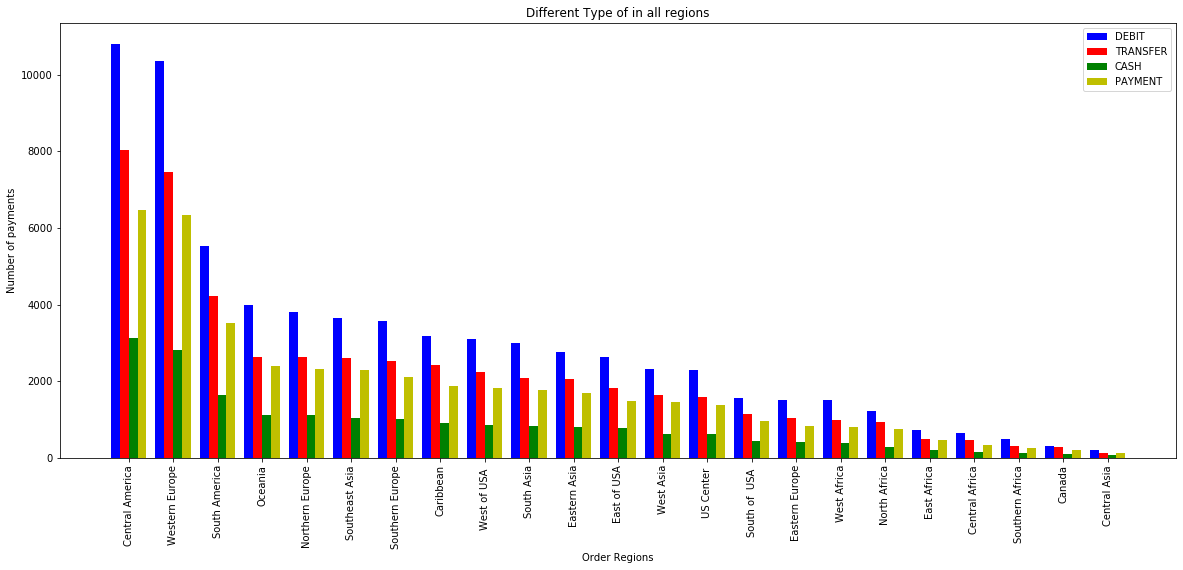

In [39]:
# 获取地区region个数
region_num = len(count1)
fig,ax = plt.subplots(figsize=(20,8))
index = np.arange(region_num)
bar_width = 0.2

type1 = plt.bar(index, count1, bar_width, color='b', label='DEBIT')
type2 = plt.bar(index+bar_width, count2, bar_width, color='r', label='TRANSFER')
type3 = plt.bar(index+bar_width*2, count3, bar_width, color='g', label='CASH')
type4 = plt.bar(index+bar_width*3, count4, bar_width, color='y', label='PAYMENT')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of in all regions')
plt.legend()
# 显示刻度
names = data['Order Region'].value_counts().keys()
#print(names)
plt.xticks(index+bar_width*1.5, names, rotation='vertical')
plt.show()

**支付方式分析**
1. 四种支付方式在不同地区的比例基本近似；
2. Debit是所有地区中使用最多的支付方式；
3. Cash是所有地区中使用最少的方式

In [40]:
# 对负收益的产品进行探索
loss = data[data['Benefit per order'] < 0]
loss[['Benefit per order', 'Order Profit Per Order']]
loss['Benefit per order'].sum()

-3883547.345768667

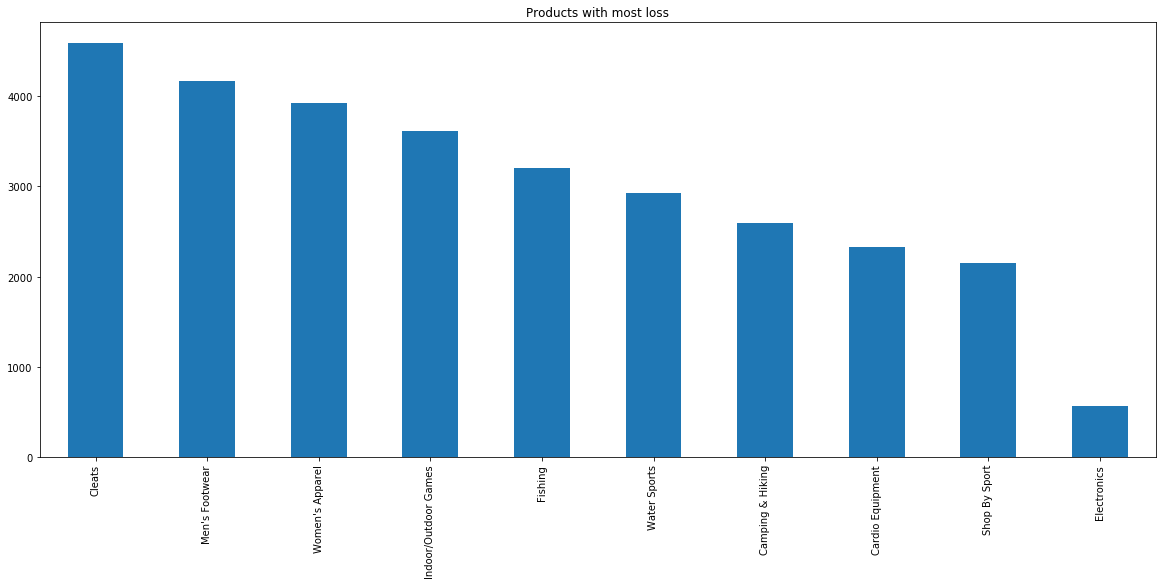

In [41]:
# 显示负收益产品中Top10的Category Name
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title='Products with most loss')
plt.show()

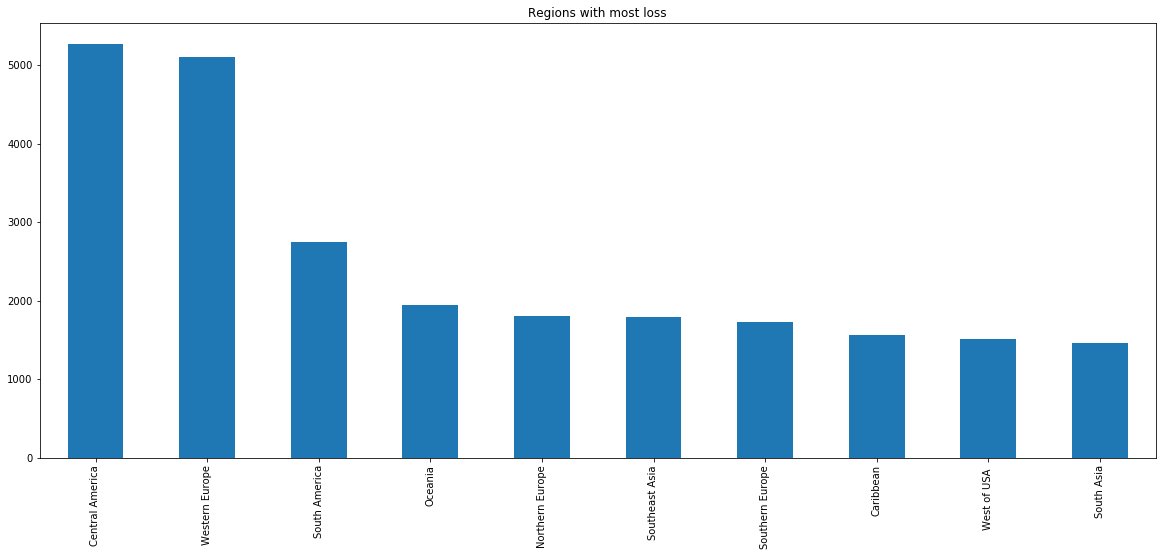

In [42]:
# 负收益地区Top10
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title='Regions with most loss')
plt.show()

In [43]:
# 负收益中是否可能是欺诈交易以及可能的支付方式
fraud = data[data['Order Status'] == 'SUSPECTED_FRAUD']
print(fraud['Type'].value_counts())
print('总的负收益：', loss['Benefit per order'].sum())
print('欺诈订单的负收益：', fraud[fraud['Benefit per order']<0]['Benefit per order'].sum())

TRANSFER    4062
Name: Type, dtype: int64
总的负收益： -3883547.345768667
欺诈订单的负收益： -90182.98003954


**负收益分析**
- transfer支付方式更容易导致欺诈

In [44]:
# 欺诈交易中的地区统计
fraud['Order Region'].value_counts()

Western Europe     705
Central America    631
South America      361
West of USA        236
Oceania            229
Southern Europe    223
Caribbean          190
Southeast Asia     187
Northern Europe    170
Eastern Asia       156
East of USA        150
West Asia          147
South Asia         144
US Center          121
North Africa        75
Eastern Europe      74
West Africa         71
South of  USA       66
Southern Africa     32
East Africa         31
Canada              29
Central Africa      28
Central Asia         6
Name: Order Region, dtype: int64

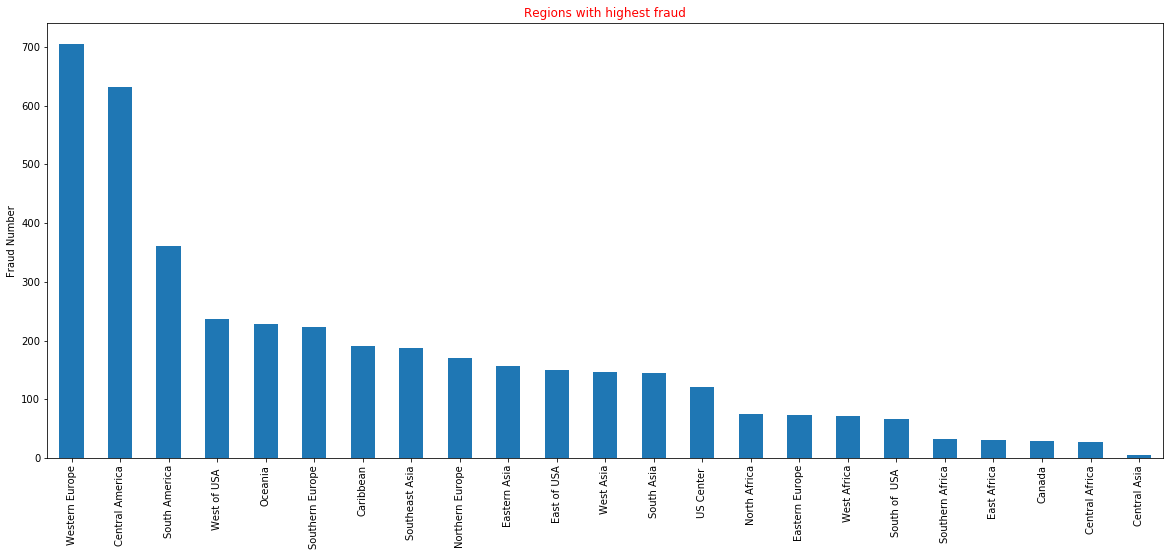

In [45]:
# 显示不同地区的欺诈交易情况
high_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Type'] == 'TRANSFER')]
high_fraud['Order Region'].value_counts().plot.bar(figsize=(20,8))
plt.title('Regions with highest fraud', color='r')
plt.ylabel('Fraud Number')
plt.show()

**地区欺诈交易分析**
- Western Europe地区的欺诈交易最多

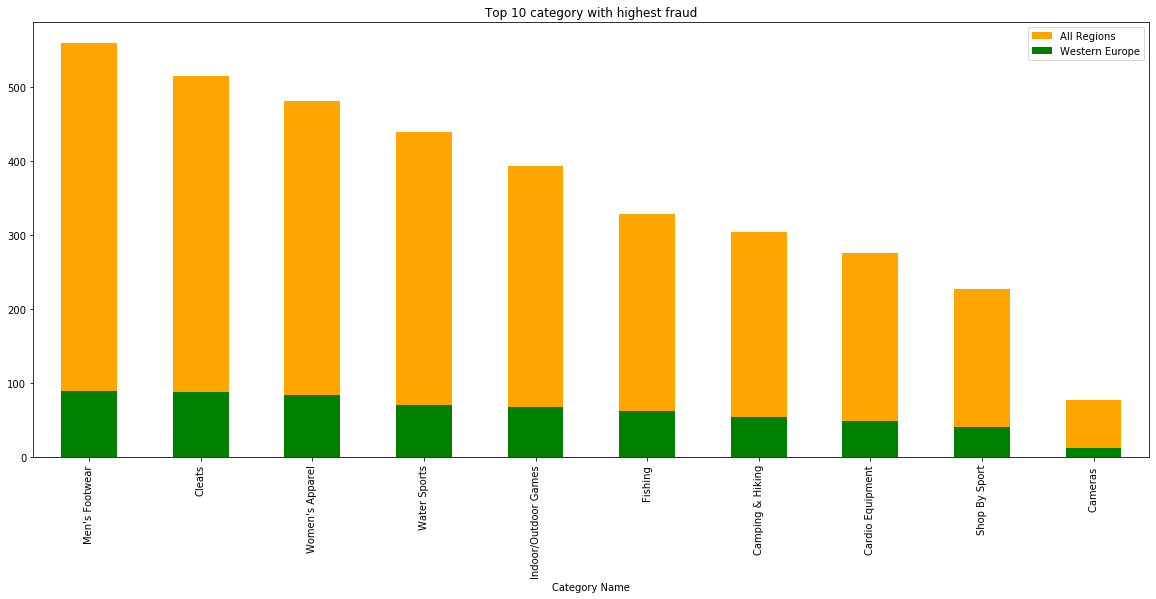

In [46]:
# 使用重叠条形图来表示：Western Europe占总欺诈的比例
high_fraud_total = data[(data['Order Status'] == 'SUSPECTED_FRAUD')]
high_fraud_we = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Order Region'] == 'Western Europe')]
# 找出风险最高的10个category
fraud1 = high_fraud_total['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title='Fraud Category', color='orange')
fraud2 = high_fraud_we['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title='Fraud Category in Western Europe', color='g')
plt.legend(['All Regions','Western Europe'])
plt.title('Top 10 category with highest fraud')
plt.xlabel('Category Name')
plt.show()

Mary Smith        528
Robert Smith       28
James Smith        23
David Smith        20
Jonathan Smith     18
Henry Smith        16
Daniel Smith       15
Mary Torres        15
Mary Jones         14
Kyle Smith         13
Name: Customer Full Name, dtype: int64


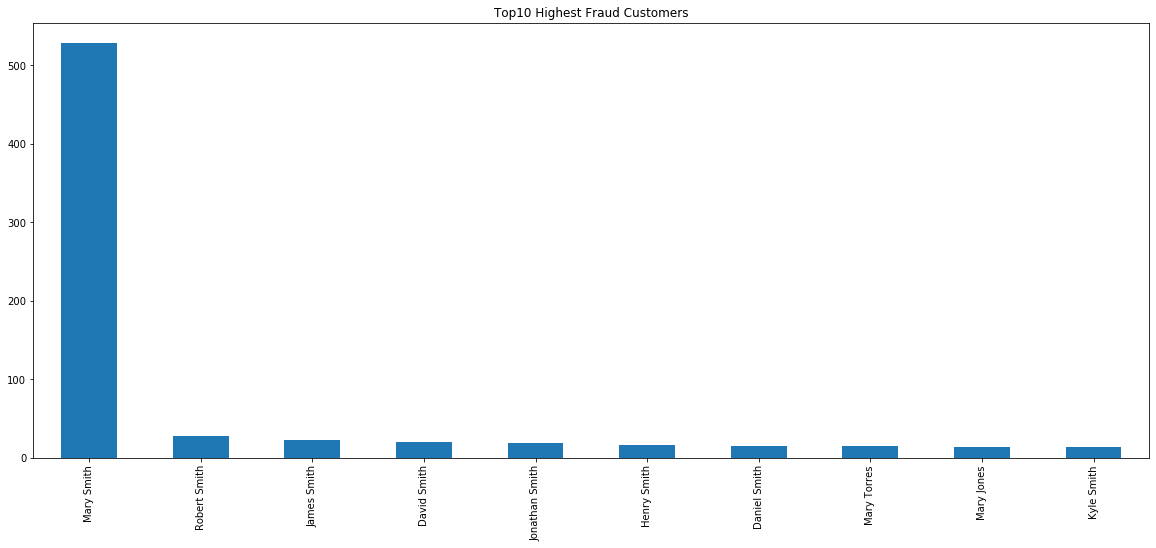

In [47]:
# 筛选出Top10 风险最高的customer
fraud['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title='Top10 Highest Fraud Customers')
print(fraud['Customer Full Name'].value_counts().nlargest(10))

**顾客欺诈行为分析**
- 单个客户来看，Mary Smith的欺诈交易最多；
- 客户群体来看，姓氏为Smith的欺诈交易最多

In [48]:
# 找到Mary Smith的交易金额
amount = data[(data['Customer Full Name'] == 'Mary Smith') & (data['Order Status'] == 'SUSPECTED_FRAUD')]
amount['Sales'].sum()

102491.66191043999

In [ ]:
# 尝试把处理完的data存储成pkl形式（比csv要方便）
with open('data.pkl', 'wb') as file:
    pickle.dump(data, file)